In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df_nonzero = df[pay_cols].map(lambda x: x if x > 0 else np.nan)
df_log = df_nonzero.apply(np.log10)

In [10]:
bill_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_features = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [11]:
df[bill_features].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,50646.744233,48624.349167,4.649736e+04,42791.362167,39884.398167,38480.350933
std,73376.695080,70893.963498,6.910251e+04,64090.316188,60606.644833,59406.836932
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3234.000000,2682.000000,2.403000e+03,2034.000000,1534.000000,1080.000000
50%,21644.500000,20597.000000,1.975250e+04,18759.500000,17835.500000,16643.000000
75%,66148.500000,62999.750000,5.952675e+04,53572.250000,49804.000000,48863.500000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


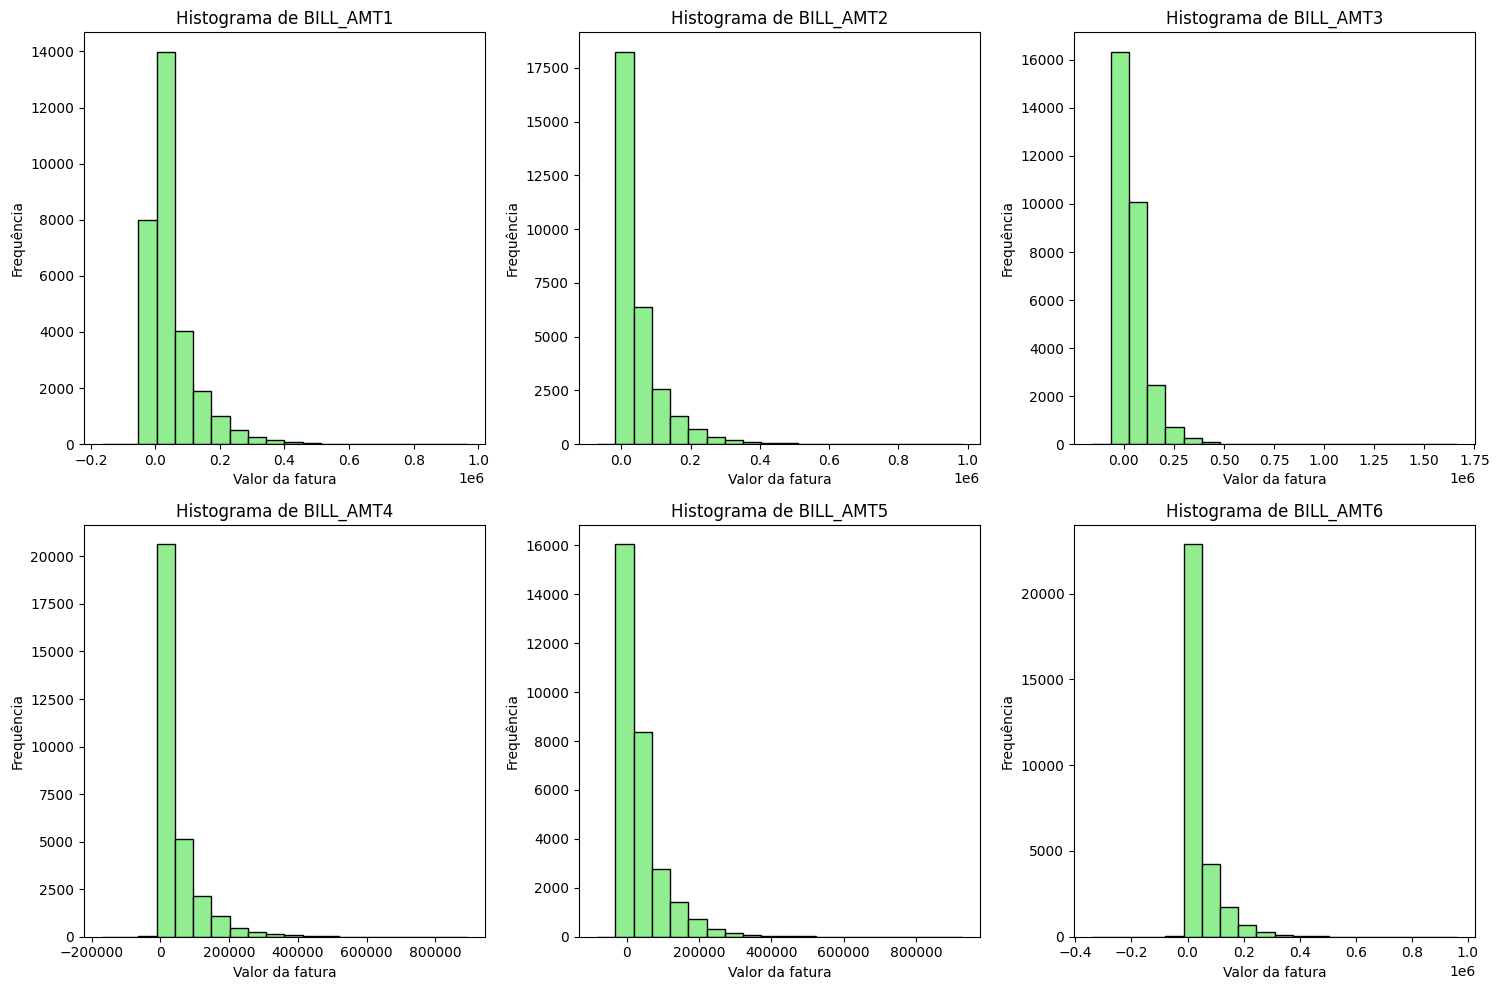

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(bill_features):
    axes[i].hist(df[col], bins=20, color='lightgreen', edgecolor='black')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel('Valor da fatura')
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [13]:
df[pay_features].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267
std,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000
50%,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


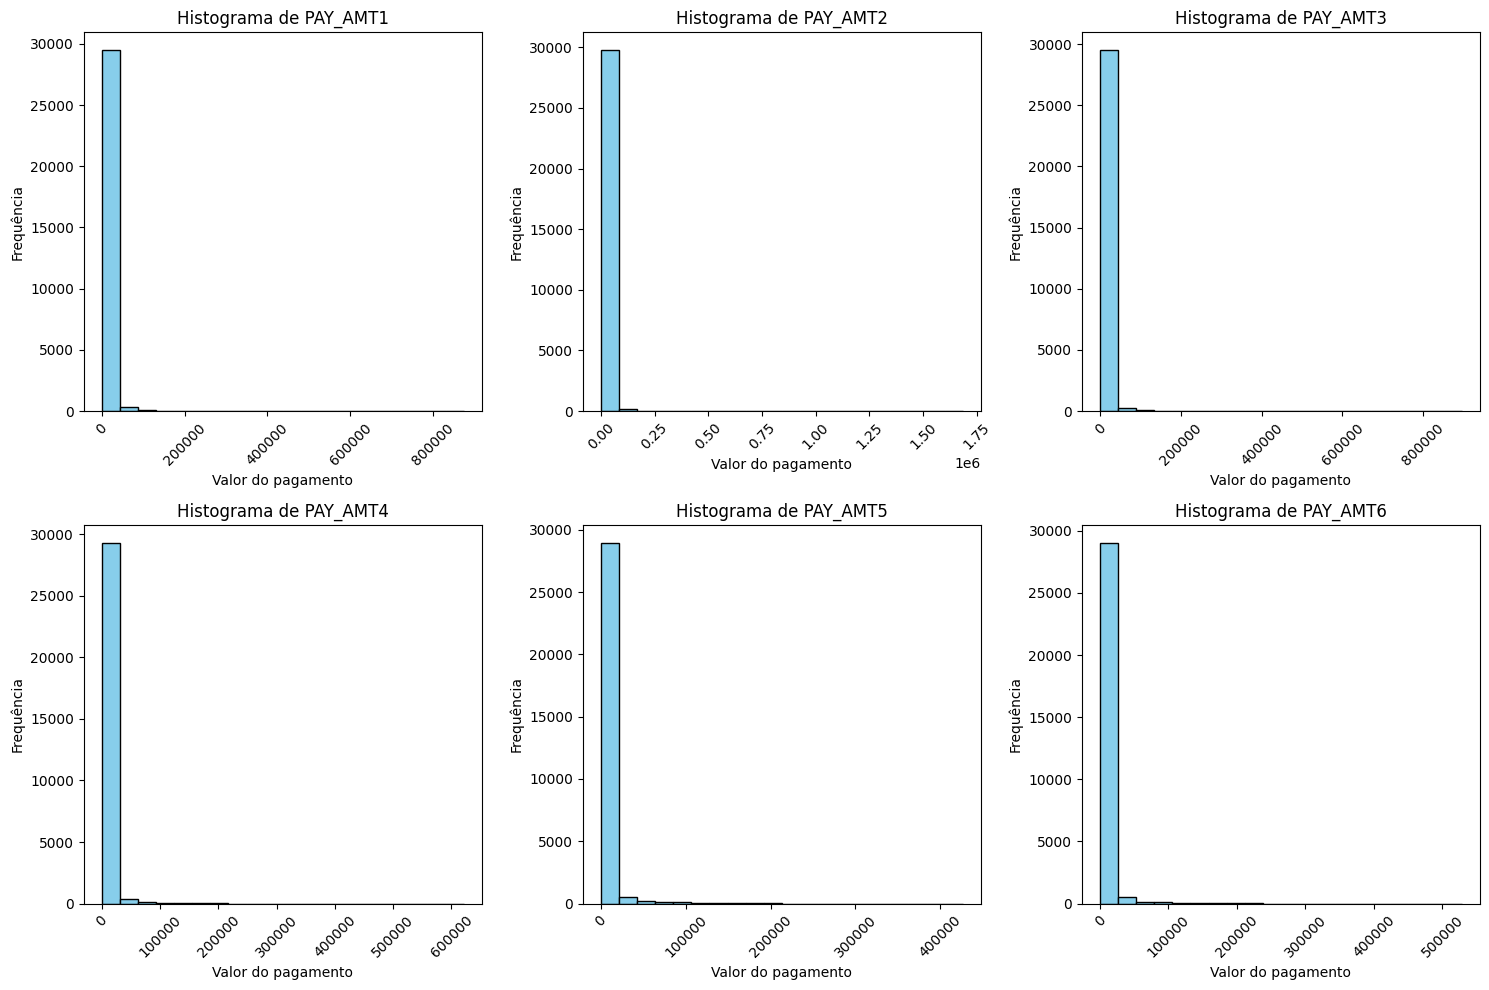

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(pay_features):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel('Valor do pagamento')
    axes[i].set_ylabel('Frequência')
    axes[i].tick_params(axis='x', rotation=45)  # xrot aplicado

plt.tight_layout()
plt.show()

In [16]:
(df[pay_features] == 0).sum()

,0
PAY_AMT1,5504
PAY_AMT2,5663
PAY_AMT3,6223
PAY_AMT4,6660
PAY_AMT5,6955
PAY_AMT6,7416


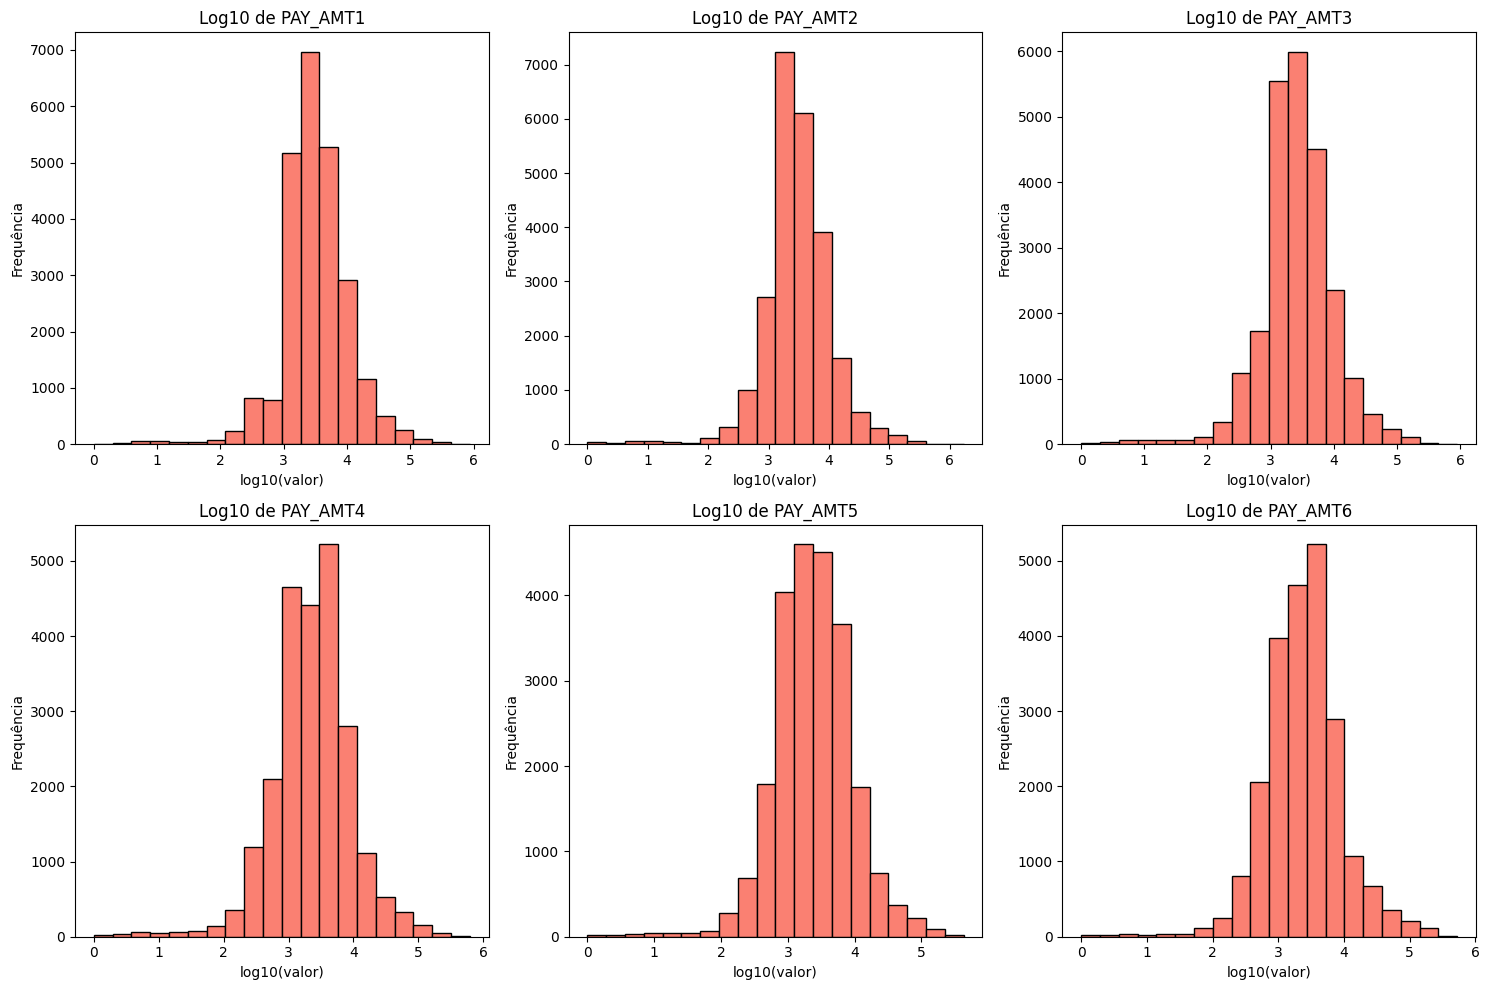

In [18]:
df_nonzero = df[pay_features].map(lambda x: x if x > 0 else np.nan)

df_log = df_nonzero.apply(np.log10)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(pay_features):
    axes[i].hist(df_log[col].dropna(), bins=20, color='salmon', edgecolor='black')
    axes[i].set_title(f'Log10 de {col}')
    axes[i].set_xlabel('log10(valor)')
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()
